# Seasonal Analysis

A seasonal analysis performd on a dataset "transactions.csv" containing transaction information like category of product and date of transaction.

Using <u><a href = "https://www.statsmodels.org/stable/index.html">statsmodels</u> for the estimation of many different statistical models and exploration.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import statsmodels.api as sm
from pylab import rcParams
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv("transactions.csv")
df.head()

,transaction_id,product_id,category,date
0,1,662685,Casual Dress,2017-10-01
1,2,154881,Casual Dress,2017-10-01
2,3,220036,Casual Dress,2017-10-01
3,4,220036,Casual Dress,2017-10-01
4,5,950839,Pullover Sweater,2017-10-01


In [4]:
df['date'] =  pd.to_datetime(df['date'],format='%Y-%m-%d') # Converting the date column to a DateTime format

In [5]:
df['count'] = [0]*len(df)
set(df.category) # Uniqque categoriess in the data

{'Casual Dress', 'Fleece Jacket', 'Pullover Sweater', 'Sleeveless Blouse'}

Grouping the data based on date and category in order to find the number of transactions of a particular category on a particular date.

In [6]:
group = df.groupby(['date', 'category'],as_index = False)[["count"]].count()

In [7]:
group.head()

,date,category,count
0,2017-10-01,Casual Dress,1923
1,2017-10-01,Fleece Jacket,18
2,2017-10-01,Pullover Sweater,964
3,2017-10-01,Sleeveless Blouse,428
4,2017-10-02,Casual Dress,1586


#### Seasonal score function

Calculating a score for a time period, we take a data for a category, the start and end date. Seasonal Decmposing of the category data, as the seasonal decomposing gives four kinds of series data observed, trend, seasonal and residual. Selecting the seasonal series data for calculation of the score, taking the mean of the data over the specified time period and its normalization gives us a seasonal score (range: [0,1]).

In [8]:
def seasonal_score(df, st, en):
    decomposition = sm.tsa.seasonal_decompose(df,freq = 30, model='additive')
    seas = decomposition.seasonal
    seas_max = seas['count'].max()
    seas_min = seas['count'].min()
    
    seas_part = seas[st:en]
    
    return (seas_part['count'].mean() - seas_min) / (seas_max - seas_min)
    

Visualization of data distributed across various categories.

### Casual Dress

In [9]:
casual_dress_df = group[group["category"] == 'Casual Dress']
casual_dress_df = casual_dress_df[['date', 'count']]
casual_dress_df['date'] = pd.to_datetime(casual_dress_df['date'],format='%Y-%m-%d')
casual_dress_df.set_index(['date'],inplace = True)
casual_dress_df.head()

,count
date,
2017-10-01,1923
2017-10-02,1586
2017-10-03,1499
2017-10-04,1720
2017-10-05,1754


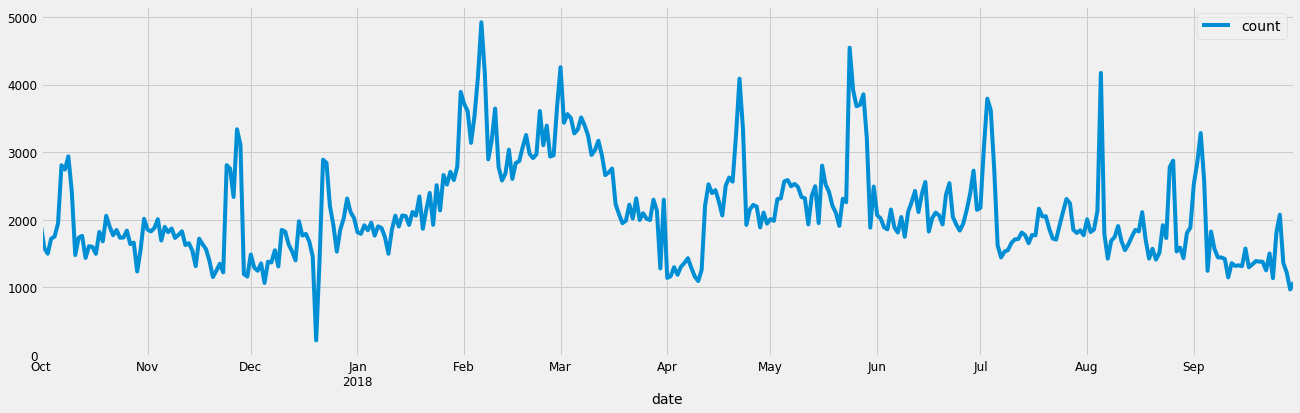

In [10]:
casual_dress_df.plot(figsize=(20, 6))

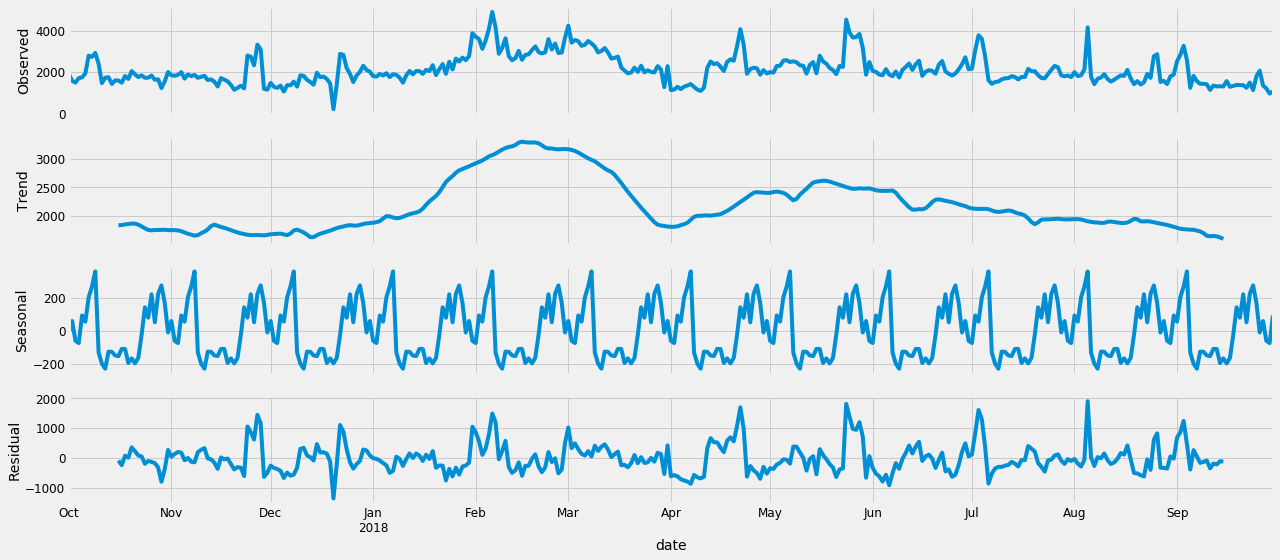

In [11]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(casual_dress_df,freq = 30, model='additive')
fig = decomposition.plot()

The graph above depicts the various components for the "Casual Dress" transactions, we can see in the trend component that sales for the Casual Dress is more in the months Feb to Mar which indicate the start of the summer season or warmer months ahead, whereas the sales decrease for the colder months i.e. Nov, Dec, Jan.

In [13]:
seasonal_score(casual_dress_df,"2018-02-20","2018-02-25") #seasonal score of category "Casual Dress" for the given time period

0.5860023663502921

### Fleece Jacket

In [15]:
fleece_jacket_df = group[group["category"] == 'Fleece Jacket']
fleece_jacket_df = fleece_jacket_df[['date', 'count']]
fleece_jacket_df['date'] = pd.to_datetime(fleece_jacket_df['date'],format='%Y-%m-%d')
fleece_jacket_df.set_index(['date'],inplace = True)
fleece_jacket_df.head()

,count
date,
2017-10-01,18
2017-10-02,27
2017-10-03,34
2017-10-04,18
2017-10-05,48


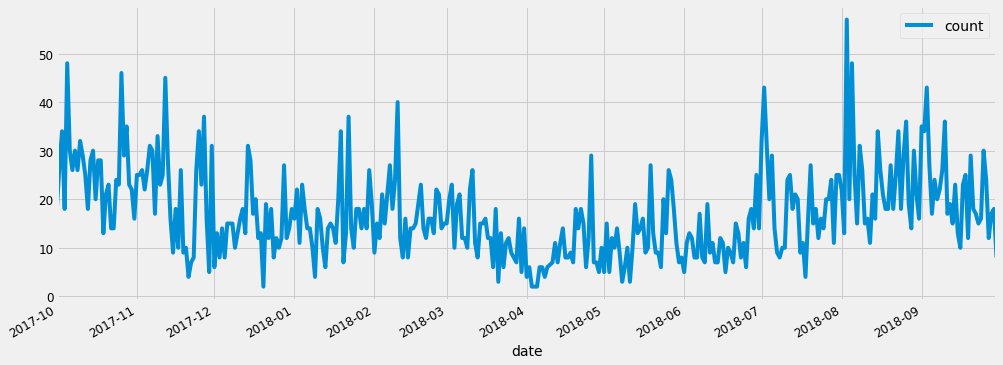

In [24]:
fleece_jacket_df.plot(figsize=(15, 6))
plt.show()

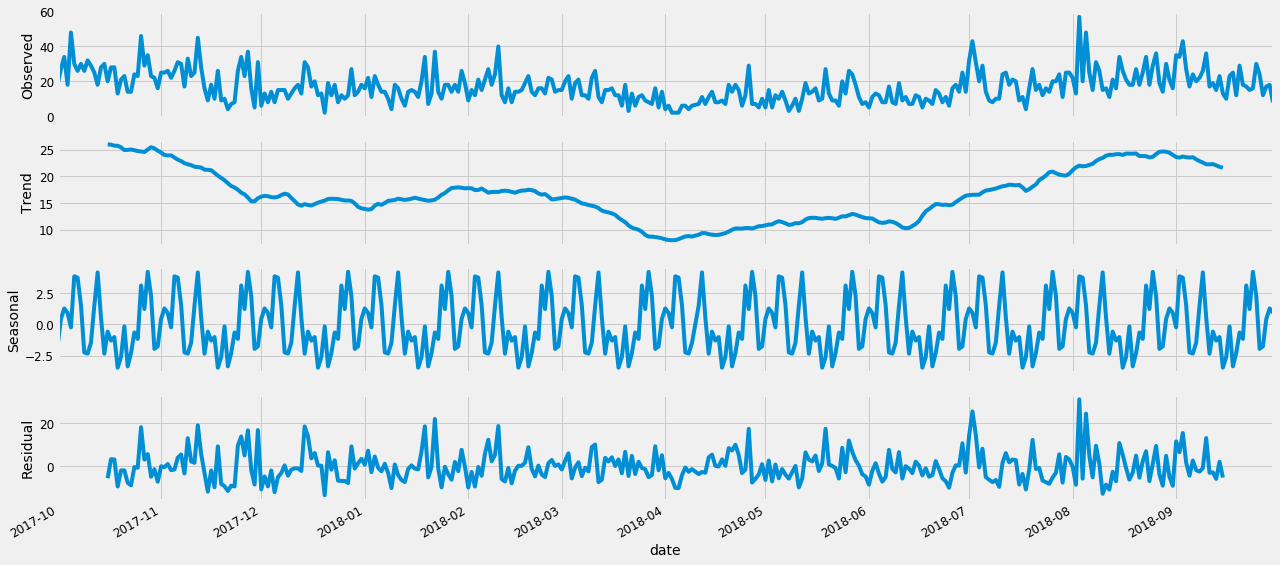

In [17]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(fleece_jacket_df,freq = 30, model='additive')
fig = decomposition.plot()

The graph above depicts the various components for the "Fleece Jacket" transactions, we can see in the trend component that sales for the Fleece Jacket is more in the months August to November which indicate the monsoon period, whereas the sales remiain relatively for the rest of the year.

In [18]:
seasonal_score(fleece_jacket_df,"2018-02-20","2018-02-25") #seasonal score of category "Fleece Jacket" for the given time period

0.5481927710843374

### Pullover Sweater

In [19]:
pullover_sweater_df = group[group["category"] == 'Pullover Sweater']
pullover_sweater_df = pullover_sweater_df[['date', 'count']]
pullover_sweater_df['date'] = pd.to_datetime(pullover_sweater_df['date'],format='%Y-%m-%d')
pullover_sweater_df.set_index(['date'],inplace = True)
pullover_sweater_df.head()

,count
date,
2017-10-01,964
2017-10-02,1098
2017-10-03,1028
2017-10-04,1001
2017-10-05,1024


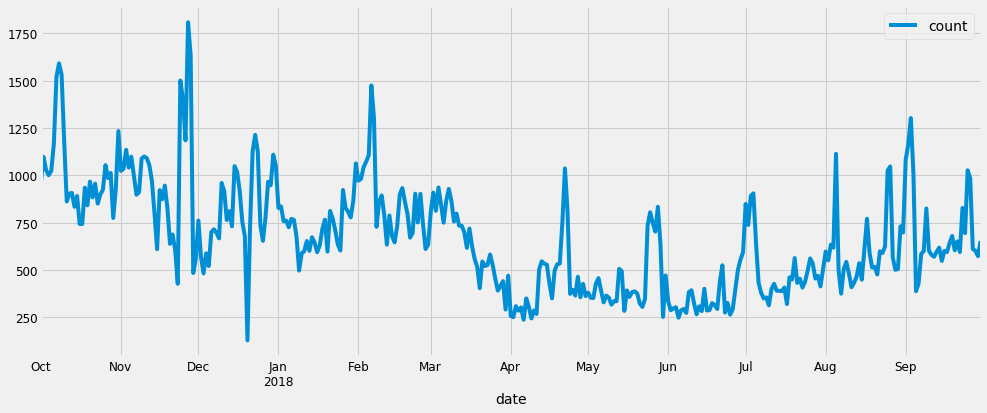

In [20]:
pullover_sweater_df.plot(figsize=(15, 6))
plt.show()

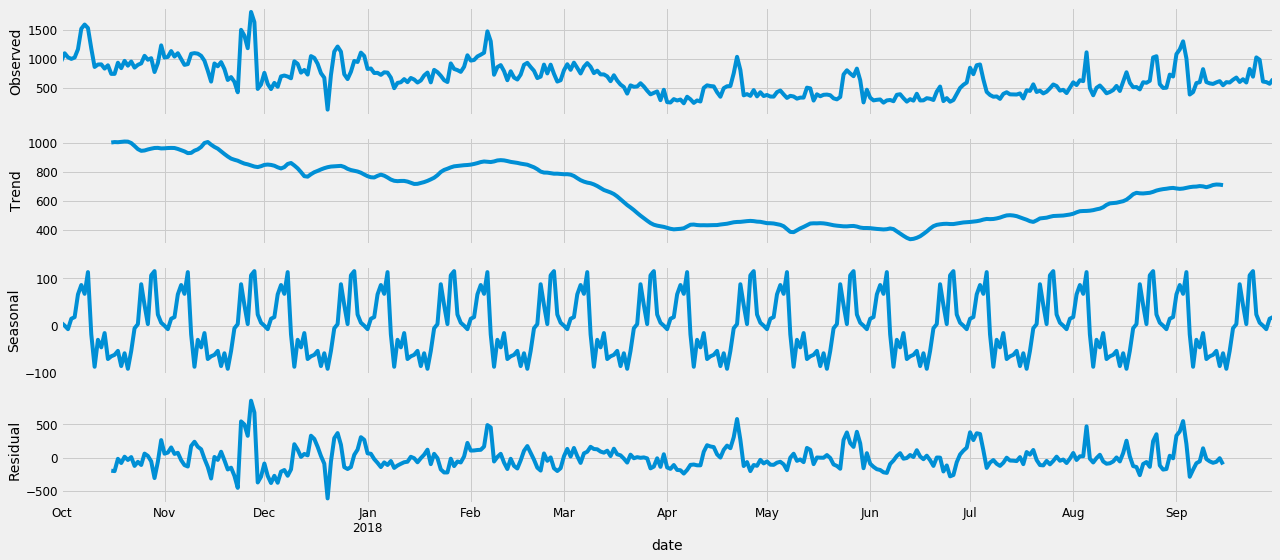

In [21]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(pullover_sweater_df,freq = 30, model='additive')
fig = decomposition.plot()

The graph above depicts the various components for the "Pullover Sweater" transactions, we can see in the trend component that sales for the Pullover Jacket is more in the months August to Feb which indicate the monsoon period, whereas the sales remiain relatively for the rest of the year.

In [23]:
seasonal_score(pullover_sweater_df,"2018-02-20","2018-02-25") #seasonal score of category "Pullover Sweater" for the given time period

0.6342448287357078

### Sleeveless Blouse

In [26]:
sleeveless_blouse_df = group[group["category"] == 'Sleeveless Blouse']
sleeveless_blouse_df = sleeveless_blouse_df[['date', 'count']]
sleeveless_blouse_df['date'] = pd.to_datetime(sleeveless_blouse_df['date'],format='%Y-%m-%d')
sleeveless_blouse_df.set_index(['date'],inplace = True)
sleeveless_blouse_df.head()

,count
date,
2017-10-01,428
2017-10-02,401
2017-10-03,333
2017-10-04,336
2017-10-05,386


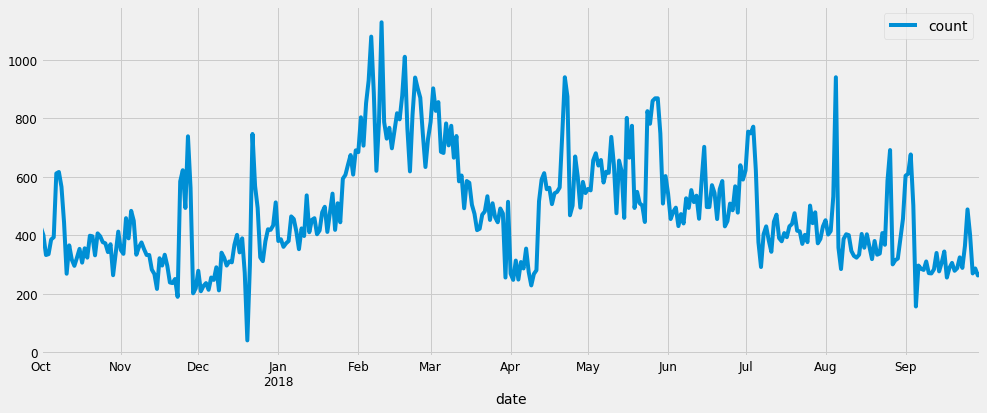

In [27]:
sleeveless_blouse_df.plot(figsize=(15, 6))
plt.show()

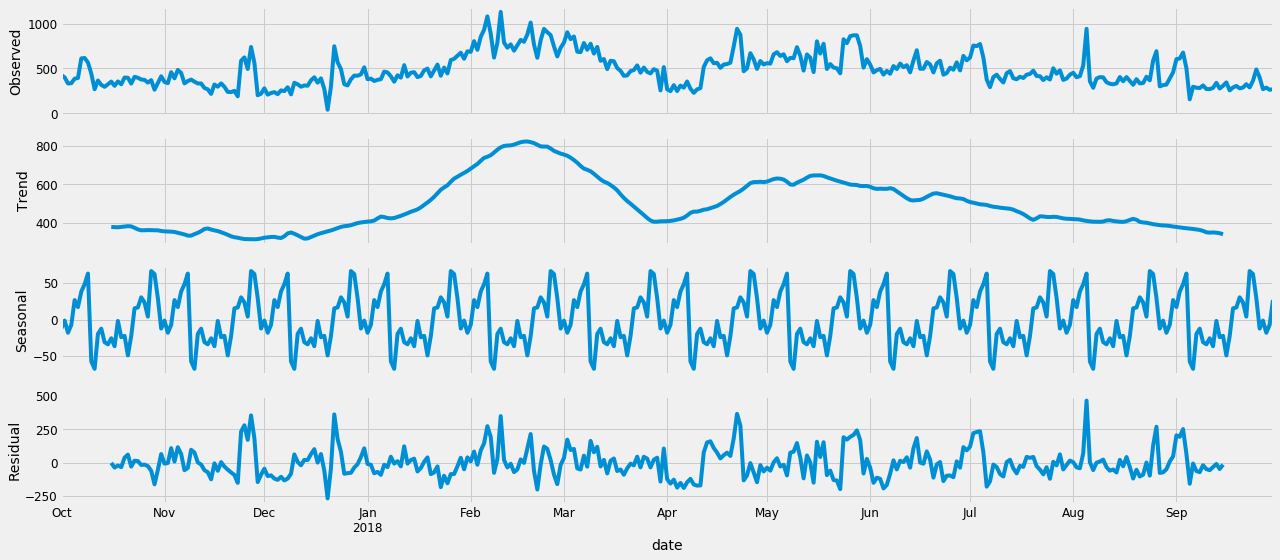

In [28]:
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(sleeveless_blouse_df,freq = 30, model='additive')
fig = decomposition.plot()

The graph above depicts the various components for the "Sleeveless Blouse" transactions, we can see in the trend component that sales for the Casual Dress is more in the months mid-Feb to Mar/April which indicate the start of the summer season or warmer months ahead, whereas the sales decrease for the colder months i.e. Nov, Dec, Jan.

In [29]:
seasonal_score(sleeveless_blouse_df,"2018-02-20","2018-02-25") #seasonal score of category "Sleeveless Blouse" for the given time period

0.6985206652271094

Data of decomposition, concatenating the various components and displaying the values for the all the components

In [33]:
df_reconstructed = pd.concat([decomposition.seasonal, decomposition.trend, decomposition.resid, decomposition.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head(30) #data for 30 days

,seas,trend,resid,actual_values
date,,,,
2017-10-01,-12.252054,NaN,NaN,428
2017-10-02,-1.362660,NaN,NaN,401
2017-10-03,-17.939933,NaN,NaN,333
2017-10-04,-7.117205,NaN,NaN,336
2017-10-05,26.638855,NaN,NaN,386
2017-10-06,17.038855,NaN,NaN,394
2017-10-07,38.232795,NaN,NaN,612
2017-10-08,48.254007,NaN,NaN,617
2017-10-09,62.752492,NaN,NaN,566
